<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Data-Import" data-toc-modified-id="1.-Data-Import-1">1. Data Import</a></span><ul class="toc-item"><li><span><a href="#a.-Data-Quality-Checking" data-toc-modified-id="a.-Data-Quality-Checking-1.1">a. Data Quality Checking</a></span></li><li><span><a href="#b.-Correlations-Between-Inputs" data-toc-modified-id="b.-Correlations-Between-Inputs-1.2">b. Correlations Between Inputs</a></span></li><li><span><a href="#c.-Delete-features" data-toc-modified-id="c.-Delete-features-1.3">c. Delete features</a></span></li></ul></li><li><span><a href="#2.-Train-Test-Split" data-toc-modified-id="2.-Train-Test-Split-2">2. Train Test Split</a></span></li><li><span><a href="#3.-Standardization-Scaler" data-toc-modified-id="3.-Standardization-Scaler-3">3. Standardization Scaler</a></span></li><li><span><a href="#4.-Resampling-(since-it-is-an-unbalanced-dataset)" data-toc-modified-id="4.-Resampling-(since-it-is-an-unbalanced-dataset)-4">4. Resampling (since it is an unbalanced dataset)</a></span></li><li><span><a href="#5.-Parameter-Tunning-on-Training-Set" data-toc-modified-id="5.-Parameter-Tunning-on-Training-Set-5">5. Parameter Tunning on Training Set</a></span><ul class="toc-item"><li><span><a href="#1.-Logistic-Regression" data-toc-modified-id="1.-Logistic-Regression-5.1">1. Logistic Regression</a></span></li><li><span><a href="#2.-Tree-(tunning-and-importance-ploting)" data-toc-modified-id="2.-Tree-(tunning-and-importance-ploting)-5.2">2. Tree (tunning and importance ploting)</a></span></li><li><span><a href="#3.-Random-Forest-(tunning-and-importance-ploting)" data-toc-modified-id="3.-Random-Forest-(tunning-and-importance-ploting)-5.3">3. Random Forest (tunning and importance ploting)</a></span></li></ul></li><li><span><a href="#6.-Profit-Curve-(Comparison-on-the-performances-on-test-set)" data-toc-modified-id="6.-Profit-Curve-(Comparison-on-the-performances-on-test-set)-6">6. Profit Curve (Comparison on the performances on test set)</a></span></li><li><span><a href="#7.-Other-Data-Explorations" data-toc-modified-id="7.-Other-Data-Explorations-7">7. Other Data Explorations</a></span></li></ul></div>

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 1. Data Import

In [332]:
df = pd.read_excel('./training_for_team7.xlsx')
#/Users/shenchen/Desktop/IDS/training_for_team7.xlsx
df.head()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,5,0,4,AFTERNOON,3,209,181,American Airlines Inc.,75506,4919,3103410,11744595,0.000098,0.000177,2,Chicago O'Hare International,41.978,-87.906,Dallas Fort Worth Regional,0.12,1.3,0.0,31,10.51
1,7,0,3,EVENING,6,102,50,SkyWest Airlines Inc.,62105,2765,2780593,3472966,0.000034,0.000099,18,Los Angeles International,33.942,-118.408,San Luis Obispo County Regional,0.00,0.0,0.0,70,9.17
2,3,0,3,MORNING,1,119,150,American Airlines Inc.,75506,1974,1472200,11744595,0.000098,0.000177,9,Logan International,42.364,-71.006,NONE,0.16,0.5,0.0,39,15.88
3,2,0,3,MIDDAY,2,45,150,American Airlines Inc.,75506,554,1391212,11744595,0.000098,0.000177,20,Fort Lauderdale-Hollywood International,26.074,-80.152,Douglas Municipal,0.00,0.0,0.0,70,9.62
4,6,1,2,AFTERNOON,2,96,79,Mesa Airlines Inc.,17869,1670,1827202,1191889,0.000000,0.000091,14,Phoenix Sky Harbor International,33.436,-112.009,Palm Springs International,0.00,0.0,0.0,71,3.80


## a. Data Quality Checking

In [333]:
# show the # instances and # varibales
df.shape

(50205, 24)

In [334]:
# show datatype and # null values
df.info(verbose=True, null_counts=True)
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50205 entries, 0 to 50204
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DAY_OF_WEEK                    50205 non-null  int64  
 1   DEP_DEL15                      50205 non-null  int64  
 2   DISTANCE_GROUP                 50205 non-null  int64  
 3   DEP_BLOCK                      50205 non-null  object 
 4   SEGMENT_NUMBER                 50205 non-null  int64  
 5   CONCURRENT_FLIGHTS             50205 non-null  int64  
 6   NUMBER_OF_SEATS                50205 non-null  int64  
 7   CARRIER_NAME                   50205 non-null  object 
 8   AIRLINE_FLIGHTS_MONTH          50205 non-null  int64  
 9   AIRLINE_AIRPORT_FLIGHTS_MONTH  50205 non-null  int64  
 10  AVG_MONTHLY_PASS_AIRPORT       50205 non-null  int64  
 11  AVG_MONTHLY_PASS_AIRLINE       50205 non-null  int64  
 12  FLT_ATTENDANTS_PER_PASS        50205 non-null 

<ipython-input-334-97e4a6cf8b11>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [335]:
# show the statistical descriptions
df_statistics = df.describe()
df_statistics.head()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
count,50205.000000,50205.000000,50205.000000,50205.000000,50205.000000,50205.000000,50205.000000,50205.000000,5.020500e+04,5.020500e+04,50205.000000,50205.000000,50205.000000,50205.000000,50205.000000,50205.000000,50205.000000,50205.000000,50205.000000,50205.000000
mean,3.845175,0.174246,3.821293,2.917976,85.144667,133.821213,59392.484155,3252.709949,1.600866e+06,7.849566e+06,0.000096,0.000136,11.668280,36.446695,-94.551209,0.098015,0.092774,0.389563,52.435036,8.545995
std,1.914273,0.379324,2.388659,1.701199,60.953925,46.396054,33088.264493,3896.782811,1.109697e+06,5.058956e+06,0.000085,0.000046,6.759745,5.543173,17.957971,0.290030,0.543972,1.515181,16.791617,4.350763
min,1.000000,0.000000,1.000000,1.000000,1.000000,44.000000,6713.000000,2.000000,8.973300e+04,4.737940e+05,0.000000,0.000007,1.000000,18.440000,-159.346000,0.000000,0.000000,0.000000,-10.000000,0.000000
25%,2.000000,0.000000,2.000000,2.000000,36.000000,90.000000,23463.000000,657.000000,6.732210e+05,2.688839e+06,0.000034,0.000099,5.000000,32.899000,-111.967000,0.000000,0.000000,0.000000,40.000000,4.920000


## b. Correlations Between Inputs

In [336]:
df.columns

Index(['DAY_OF_WEEK', 'DEP_DEL15', 'DISTANCE_GROUP', 'DEP_BLOCK',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX',
       'AWND'],
      dtype='object')

<AxesSubplot:>

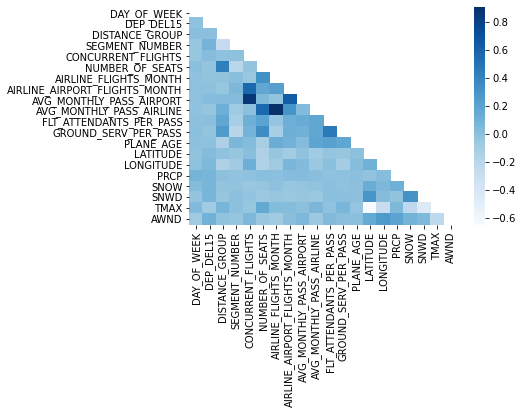

In [337]:
# correlation matrix
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(corr, cmap='Blues', annot=False, mask=mask.T)

## c. Delete features

In [338]:
df2 = df[['DAY_OF_WEEK', 'DEP_DEL15', 'DISTANCE_GROUP', 'DEP_BLOCK',
       'SEGMENT_NUMBER', 'NUMBER_OF_SEATS', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
        'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'LATITUDE',
       'LONGITUDE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']]
# 'AVG_MONTHLY_PASS_AIRLINE','CONCURRENT_FLIGHTS'            delete as high correlation
# 'DEPARTING_AIRPORT','PREVIOUS_AIRPORT','CARRIER_NAME'      delete as categorical
df2.head()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,NUMBER_OF_SEATS,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
0,5,0,4,AFTERNOON,3,181,75506,4919,3103410,0.000098,0.000177,2,41.978,-87.906,0.12,1.3,0.0,31,10.51
1,7,0,3,EVENING,6,50,62105,2765,2780593,0.000034,0.000099,18,33.942,-118.408,0.00,0.0,0.0,70,9.17
2,3,0,3,MORNING,1,150,75506,1974,1472200,0.000098,0.000177,9,42.364,-71.006,0.16,0.5,0.0,39,15.88
3,2,0,3,MIDDAY,2,150,75506,554,1391212,0.000098,0.000177,20,26.074,-80.152,0.00,0.0,0.0,70,9.62
4,6,1,2,AFTERNOON,2,79,17869,1670,1827202,0.000000,0.000091,14,33.436,-112.009,0.00,0.0,0.0,71,3.80


# 2. Train Test Split

In [339]:
from sklearn.model_selection import train_test_split

rdn_seed = 42
np.random.seed(rdn_seed)
train, test = train_test_split(df2, train_size = 0.8, random_state=rdn_seed)
train.shape, test.shape

((40164, 19), (10041, 19))

In [340]:
X_train = train.drop('DEP_DEL15',axis=1)
X_test  = test.drop('DEP_DEL15',axis=1)
y_train = train[['DEP_DEL15']]
y_test  = test[['DEP_DEL15']]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40164, 18), (10041, 18), (40164, 1), (10041, 1))

In [341]:
X_test.head()

,DAY_OF_WEEK,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,NUMBER_OF_SEATS,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
5369,5,3,MIDDAY,2,120,46218,5037,2743323,0.000254,0.000229,20,39.774,-104.880,0.08,0.3,0.0,41,10.51
45514,1,5,MORNING,2,154,46218,5037,2743323,0.000254,0.000229,18,39.774,-104.880,0.07,2.3,1.2,31,12.97
45366,3,5,AFTERNOON,2,181,20315,138,2743323,0.000032,0.000175,5,39.774,-104.880,0.00,0.0,0.0,50,4.92
30642,3,5,AFTERNOON,4,110,73508,4850,1581456,0.000144,0.000149,18,44.886,-93.218,0.00,0.0,0.0,65,11.63
37231,4,6,EVENING,4,160,73508,3403,1065782,0.000144,0.000149,20,40.784,-111.967,0.00,0.0,0.0,47,3.36


# 3. Standardization Scaler

In [342]:
# only scale the numerical variables
Cate_train = X_train[['DAY_OF_WEEK','DEP_BLOCK']]
Num_train  = X_train.drop(['DAY_OF_WEEK','DEP_BLOCK'],axis=1)
Cate_test  = X_test[['DAY_OF_WEEK','DEP_BLOCK']]
Num_test   = X_test.drop(['DAY_OF_WEEK','DEP_BLOCK'],axis=1)
Cate_train.shape, Num_train.shape, Cate_test.shape, Num_test.shape

((40164, 2), (40164, 16), (10041, 2), (10041, 16))

In [343]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(Num_train)
Num_train[:] = scalerX.transform(Num_train)
Num_train.head()

,DISTANCE_GROUP,SEGMENT_NUMBER,NUMBER_OF_SEATS,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
42942,-0.763120,2.999769,-1.249728,-1.054592,-0.544739,0.365466,-1.116079,-0.262256,0.048267,-0.219101,0.760506,0.112545,-0.171671,-0.257436,-0.680736,-0.264662
46388,-0.763120,-0.537512,0.195773,1.448332,0.050327,1.063785,-0.405859,-0.800505,1.083916,-0.448941,-1.328063,0.389359,-0.171671,-0.257436,0.448481,-0.160818
7725,-0.344873,0.052035,-1.249728,-1.054592,-0.763839,-1.183905,-1.116079,-0.262256,0.048267,-1.071146,0.718592,-0.337277,-0.171671,-0.257436,0.983374,-0.264662
10608,-0.763120,1.820676,-1.810669,0.079256,-0.126084,1.063785,-0.729593,-0.798345,0.788016,-0.448941,-1.328063,-0.337277,-0.171671,-0.257436,0.507914,-0.832343
45881,0.073373,-0.537512,-1.379176,0.079256,-0.102425,-0.104287,-0.729593,-0.798345,-1.579182,1.040428,0.626292,0.839181,7.008126,2.307193,-0.977899,0.252251


In [344]:
Num_test.iloc[:] = scalerX.transform(Num_test)
Num_test.head()

,DISTANCE_GROUP,SEGMENT_NUMBER,NUMBER_OF_SEATS,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
5369,-0.344873,-0.537512,-0.300444,-0.401333,0.458181,1.030155,1.846247,2.008871,1.231866,0.600727,-0.574056,-0.060463,0.380621,-0.257436,-0.680736,0.457632
45514,0.491620,-0.537512,0.433094,-0.401333,0.458181,1.030155,1.846247,2.008871,0.935966,0.600727,-0.574056,-0.095065,4.062568,0.531681,-1.275061,1.025313
45366,0.491620,-0.537512,1.015609,-1.184911,-0.801641,1.030155,-0.751879,0.834369,-0.987382,0.600727,-0.574056,-0.337277,-0.171671,-0.257436,-0.145844,-0.832343
30642,0.491620,0.641582,-0.516190,0.424202,0.410093,-0.018215,0.560251,0.274135,0.935966,1.520805,0.075947,-0.337277,-0.171671,-0.257436,0.745644,0.716088
37231,0.909867,0.641582,0.562542,0.424202,0.037983,-0.483516,0.560251,0.274135,1.231866,0.782511,-0.969062,-0.337277,-0.171671,-0.257436,-0.324141,-1.192336


In [345]:
# reunion the dataset
X_train_full = pd.concat([Cate_train,Num_train],axis=1)
X_test_full  = pd.concat([Cate_test,Num_test],axis=1)
X_train_full.shape, y_train.shape, X_test_full.shape, y_test.shape

((40164, 18), (40164, 1), (10041, 18), (10041, 1))

# 4. Resampling (since it is an unbalanced dataset)

In [346]:
from imblearn.over_sampling import SMOTENC

# run SMOTENC
rdn_seed = 42
smnc = SMOTENC(random_state=rdn_seed, categorical_features=[0,1])
X_train_full_res, y_train_res = smnc.fit_resample(X_train_full, y_train)

print('before OverSampling, the shape of train_X: {}'.format(X_train_full.shape))
print('After OverSampling, the shape of train_X: {}'.format(X_train_full_res.shape))

before OverSampling, the shape of train_X: (40164, 18)
After OverSampling, the shape of train_X: (66458, 18)


In [347]:
X_y_train = pd.concat([y_train_res,X_train_full_res],axis=1)
X_y_test  = pd.concat([y_test,X_test_full],axis=1)
X_y_train.shape, X_y_test.shape

((66458, 19), (10041, 19))

In [348]:
X_y_test = X_y_test.reset_index(drop=True)
X_y_test.head()

,DEP_DEL15,DAY_OF_WEEK,DEP_BLOCK,DISTANCE_GROUP,SEGMENT_NUMBER,NUMBER_OF_SEATS,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
0,0,5,MIDDAY,-0.344873,-0.537512,-0.300444,-0.401333,0.458181,1.030155,1.846247,2.008871,1.231866,0.600727,-0.574056,-0.060463,0.380621,-0.257436,-0.680736,0.457632
1,0,1,MORNING,0.491620,-0.537512,0.433094,-0.401333,0.458181,1.030155,1.846247,2.008871,0.935966,0.600727,-0.574056,-0.095065,4.062568,0.531681,-1.275061,1.025313
2,0,3,AFTERNOON,0.491620,-0.537512,1.015609,-1.184911,-0.801641,1.030155,-0.751879,0.834369,-0.987382,0.600727,-0.574056,-0.337277,-0.171671,-0.257436,-0.145844,-0.832343
3,0,3,AFTERNOON,0.491620,0.641582,-0.516190,0.424202,0.410093,-0.018215,0.560251,0.274135,0.935966,1.520805,0.075947,-0.337277,-0.171671,-0.257436,0.745644,0.716088
4,0,4,EVENING,0.909867,0.641582,0.562542,0.424202,0.037983,-0.483516,0.560251,0.274135,1.231866,0.782511,-0.969062,-0.337277,-0.171671,-0.257436,-0.324141,-1.192336


In [349]:
X_y_train.head()

,DEP_DEL15,DAY_OF_WEEK,DEP_BLOCK,DISTANCE_GROUP,SEGMENT_NUMBER,NUMBER_OF_SEATS,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
0,0,6,LATE_NIGHT,-0.763120,2.999769,-1.249728,-1.054592,-0.544739,0.365466,-1.116079,-0.262256,0.048267,-0.219101,0.760506,0.112545,-0.171671,-0.257436,-0.680736,-0.264662
1,0,1,MORNING,-0.763120,-0.537512,0.195773,1.448332,0.050327,1.063785,-0.405859,-0.800505,1.083916,-0.448941,-1.328063,0.389359,-0.171671,-0.257436,0.448481,-0.160818
2,0,2,MIDDAY,-0.344873,0.052035,-1.249728,-1.054592,-0.763839,-1.183905,-1.116079,-0.262256,0.048267,-1.071146,0.718592,-0.337277,-0.171671,-0.257436,0.983374,-0.264662
3,0,7,LATE_NIGHT,-0.763120,1.820676,-1.810669,0.079256,-0.126084,1.063785,-0.729593,-0.798345,0.788016,-0.448941,-1.328063,-0.337277,-0.171671,-0.257436,0.507914,-0.832343
4,0,1,MORNING,0.073373,-0.537512,-1.379176,0.079256,-0.102425,-0.104287,-0.729593,-0.798345,-1.579182,1.040428,0.626292,0.839181,7.008126,2.307193,-0.977899,0.252251


# 5. Parameter Tunning on Training Set

In [350]:
# turn categorical variables into dummy variables (training set)
dftrain_1 = pd.get_dummies(X_y_train[['DEP_BLOCK']])

dftrain_0 = X_y_train['DAY_OF_WEEK'].map({1:'DoW_Mon',2:'DoW_Tue',3:'DoW_Wed',4:'DoW_Thu',5:'DoW_Fri',6:'DoW_Sat',7:'DoW_Sun'})
dftrain_2 = pd.get_dummies(dftrain_0)

df_train = pd.concat([X_y_train,dftrain_1,dftrain_2],axis=1)
df_train = df_train.drop(['DEP_BLOCK','DAY_OF_WEEK'],axis=1)

df_train.shape

(66458, 30)

In [351]:
# turn categorical variables into dummy variables (test set)
dftest_1 = pd.get_dummies(X_y_test[['DEP_BLOCK']])

dftest_0 = X_y_test['DAY_OF_WEEK'].map({1:'DoW_Mon',2:'DoW_Tue',3:'DoW_Wed',4:'DoW_Thu',5:'DoW_Fri',6:'DoW_Sat',7:'DoW_Sun'})
dftest_2 = pd.get_dummies(dftest_0)

df_test = pd.concat([X_y_test,dftest_1,dftest_2],axis=1)
df_test = df_test.drop(['DEP_BLOCK','DAY_OF_WEEK'],axis=1)

df_test.shape

(10041, 30)

In [352]:
df_train.head()

,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,NUMBER_OF_SEATS,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND,DEP_BLOCK_AFTERNOON,DEP_BLOCK_EARLY_MORNING,DEP_BLOCK_EVENING,DEP_BLOCK_LATE_NIGHT,DEP_BLOCK_MIDDAY,DEP_BLOCK_MORNING,DoW_Fri,DoW_Mon,DoW_Sat,DoW_Sun,DoW_Thu,DoW_Tue,DoW_Wed
0,0,-0.763120,2.999769,-1.249728,-1.054592,-0.544739,0.365466,-1.116079,-0.262256,0.048267,-0.219101,0.760506,0.112545,-0.171671,-0.257436,-0.680736,-0.264662,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,-0.763120,-0.537512,0.195773,1.448332,0.050327,1.063785,-0.405859,-0.800505,1.083916,-0.448941,-1.328063,0.389359,-0.171671,-0.257436,0.448481,-0.160818,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0,-0.344873,0.052035,-1.249728,-1.054592,-0.763839,-1.183905,-1.116079,-0.262256,0.048267,-1.071146,0.718592,-0.337277,-0.171671,-0.257436,0.983374,-0.264662,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,-0.763120,1.820676,-1.810669,0.079256,-0.126084,1.063785,-0.729593,-0.798345,0.788016,-0.448941,-1.328063,-0.337277,-0.171671,-0.257436,0.507914,-0.832343,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0.073373,-0.537512,-1.379176,0.079256,-0.102425,-0.104287,-0.729593,-0.798345,-1.579182,1.040428,0.626292,0.839181,7.008126,2.307193,-0.977899,0.252251,0,0,0,0,0,1,0,1,0,0,0,0,0


In [353]:
df_train.to_excel('./train_smot_1203.xlsx')

In [354]:
df_test.to_excel('./test_smot_1203.xlsx')

In [355]:
# split X and y
X_train = df_train.drop('DEP_DEL15',axis=1)
X_test  = df_test.drop('DEP_DEL15',axis=1)
y_train = df_train['DEP_DEL15']
y_test  = df_test['DEP_DEL15']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((66458, 29), (66458,), (10041, 29), (10041,))

In [356]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score

## 1. Logistic Regression

In [357]:
# tune parameters
pipe_logistic = LogisticRegression(solver = 'liblinear',random_state=rdn_seed)

para_logistic = {
    'penalty': ('l1', 'l2'),
    'C'      : list(np.power(10.0, np.arange(-10, 10)))
}

grid_search_logistic = GridSearchCV(
    pipe_logistic, 
    para_logistic, 
    scoring='roc_auc', 
    cv=5)

grid_search_logistic.fit(X_train,y_train)
print('best auc：%0.3f' % grid_search_logistic.best_score_)

best auc：0.675


In [358]:
grid_search_logistic.best_params_

{'C': 100.0, 'penalty': 'l1'}

In [359]:
best_LogisticRegression = LogisticRegression(
    solver  = 'liblinear',
    penalty = grid_search_logistic.best_params_['penalty'],
    C       = grid_search_logistic.best_params_['C'],
    random_state=rdn_seed)

best_LogisticRegression.fit(X_train,y_train)

LogisticRegression(C=100.0, penalty='l1', random_state=42, solver='liblinear')

## 2. Tree (tunning and importance ploting)

In [360]:
# 1. tune parameters
pipe_tree = DecisionTreeClassifier(random_state=rdn_seed)

para_tree = {
    'max_depth': np.arange(5, 15), 
    'min_samples_leaf': np.arange(5,15),
    'min_samples_split': np.arange(5,15)
}

grid_search_tree = GridSearchCV(
    pipe_tree, 
    para_tree, 
    scoring='roc_auc', 
    cv=5)

grid_search_tree.fit(X_train,y_train)
print('best auc：%0.3f' % grid_search_tree.best_score_)

best auc：0.856


In [361]:
grid_search_tree.best_params_

{'max_depth': 14, 'min_samples_leaf': 6, 'min_samples_split': 14}

In [362]:
best_decision_tree = DecisionTreeClassifier(
    max_depth         = grid_search_tree.best_params_['max_depth'],
    min_samples_leaf  = grid_search_tree.best_params_['min_samples_leaf'],
    min_samples_split = grid_search_tree.best_params_['min_samples_split'],
    random_state=rdn_seed)

best_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=6, min_samples_split=14,
                       random_state=42)

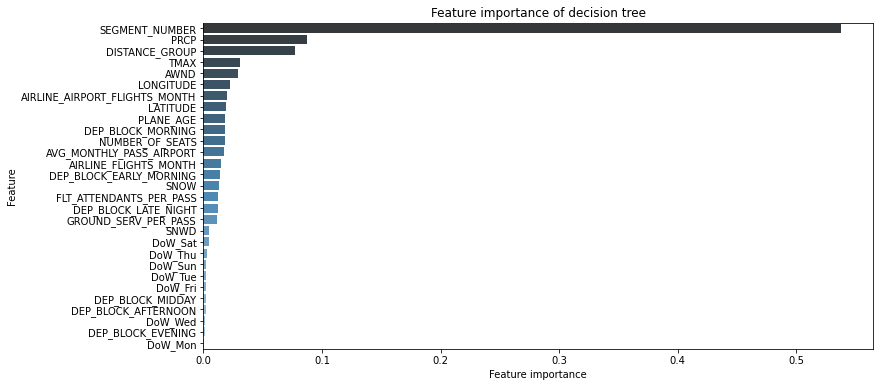

In [368]:
# 2. feature importances

# sorted features (desc)    
y_tree = pd.Series(best_decision_tree.feature_importances_, 
                   index=X_train.columns).sort_values(ascending=False).index
    
# sorted importances (desc)     
x_tree = pd.Series(best_decision_tree.feature_importances_, 
                   index=X_train.columns).sort_values(ascending=False).values
    
plt.figure(figsize=(12,6))
plt.title("Feature importance of decision tree")

sns.barplot(y = y_tree, x = x_tree, orient='h', palette="Blues_r_d")
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

## 3. Random Forest (tunning and importance ploting)

In [369]:
# 1. tune n_estimators
pipe_rf1 = RandomForestClassifier(
    random_state=rdn_seed)

para_rf1 = {
    'n_estimators': range(100, 201, 10),
}

grid_search_rf1 = GridSearchCV(
    pipe_rf1, 
    para_rf1, 
    scoring='roc_auc', 
    cv=5)

grid_search_rf1.fit(X_train,y_train)
print('best auc：%0.3f' % grid_search_rf1.best_score_)

best auc：0.954


In [370]:
grid_search_rf1.best_params_

{'n_estimators': 200}

In [371]:
# 2. tune max_depth
pipe_rf2 = RandomForestClassifier(
    n_estimators = grid_search_rf1.best_params_['n_estimators'],
    random_state=rdn_seed)

para_rf2 = {
    'max_depth': range(5,31,5),
}

grid_search_rf2 = GridSearchCV(
    pipe_rf2, 
    para_rf2, 
    scoring='roc_auc', cv=5)

grid_search_rf2.fit(X_train,y_train)
print('best auc：%0.3f' % grid_search_rf2.best_score_)

best auc：0.954


In [372]:
grid_search_rf2.best_params_

{'max_depth': 30}

In [382]:
# 3. tune min_samples_split
pipe_rf3 = RandomForestClassifier(
    n_estimators = grid_search_rf1.best_params_['n_estimators'], 
    max_depth    = grid_search_rf2.best_params_['max_depth'],
    random_state=rdn_seed)

para_rf3 = {
    'min_samples_split':np.arange(2, 5, 1)
}

grid_search_rf3 = GridSearchCV(
    pipe_rf3, 
    para_rf3, 
    scoring='roc_auc', 
    cv=5)

grid_search_rf3.fit(X_train,y_train)
print('best auc：%0.3f' % grid_search_rf3.best_score_)

best auc：0.954


In [383]:
grid_search_rf3.best_params_

{'min_samples_split': 2}

In [375]:
best_random_forest = RandomForestClassifier(
    n_estimators      = grid_search_rf1.best_params_['n_estimators'],
    max_depth         = grid_search_rf2.best_params_['max_depth'],
    min_samples_split = grid_search_rf3.best_params_['min_samples_split'],
    random_state=rdn_seed)

best_random_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, n_estimators=200, random_state=42)

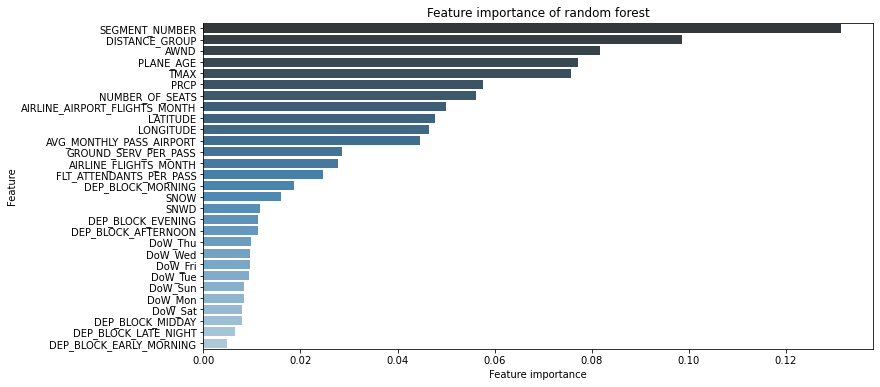

In [376]:
# 4. feature importances

# sorted features (desc)    
y_rf = pd.Series(best_random_forest.feature_importances_, 
                 index=X_train.columns).sort_values(ascending=False).index
    
# sorted importances (desc)     
x_rf = pd.Series(best_random_forest.feature_importances_, 
                 index=X_train.columns).sort_values(ascending=False).values
    
plt.figure(figsize=(12,6))
plt.title("Feature importance of random forest")

sns.barplot(y = y_rf, x = x_rf, orient='h', palette="Blues_r_d")
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

# 6. Profit Curve (Comparison on the performances on test set)

In [377]:
# cost benefit matrix
# data from https://www.airlines.org/dataset/u-s-passenger-carrier-delay-costs/

profit_TP = -(24.55*10) # cost of rearranging the predicted delayed flights
profit_FN = -(74.24*15) # cost of delay
profit_FP = -(24.55*10) # cost of rearranging the predicted delayed flights
profit_TN = 0

cb_matrix = np.array([[profit_TP, profit_FP],[profit_FN, profit_TN]])
cb_matrix

array([[ -245.5,  -245.5],
       [-1113.6,     0. ]])

In [378]:
# confusion matrix
def confusion_matrix(y_true, y_predict):
    TP = sum((y_true == 1) & (y_predict == 1))
    TN = sum((y_true == 0) & (y_predict == 0))
    FP = sum((y_true == 0) & (y_predict == 1))
    FN = sum((y_true == 1) & (y_predict == 0))
    
    return np.array([[TP,FP],[FN,TN]])

In [387]:
# Plot the profit curves
def plot_profit_curve(model, label, cb, X_train, X_test, y_train, y_test, col):
    # get probability for each instance
    model.fit(X_train, y_train)
    predict_probas = model.predict_proba(X_test)[:,1]

    # sort prob and true lables from the highest to the lowest
    order = np.argsort(predict_probas)[::-1]
    sorted_probs  = predict_probas[order]
    sorted_labels = y_test[order]
    
    profit_list = []
    
    # get profit for each threshold
    for prob, true_lables in zip(sorted_probs, sorted_labels):
        predicted_labels = sorted_probs > prob + .0001
        c_matrix         = confusion_matrix(sorted_labels, predicted_labels)
        profit_list.append((cb * c_matrix).sum() / float(len(y_test)))
    
    # get max profit point and the location
    max_index     = np.argmax(profit_list)
    max_threshold = max_index/len(y_test)
    max_profit    = profit_list[max_index]
    
    # plot the line and dot
    plt.plot(np.arange(0,1,1/len(y_test)), profit_list, label=label, color=col, linewidth=1)
    plt.plot(max_threshold, max_profit, '.', color=col, markersize=12)
    
    # print the threshold and the expected profit
    print(label,'gives {:.2f} expected profit at the threshold of {:.2f}'.format(max_profit, max_threshold))

LogisticRegression gives -183.86 expected profit at the threshold of 0.24
DecisionTreeClassifier gives -187.89 expected profit at the threshold of 0.23
RandomForestClassifier gives -173.83 expected profit at the threshold of 0.30


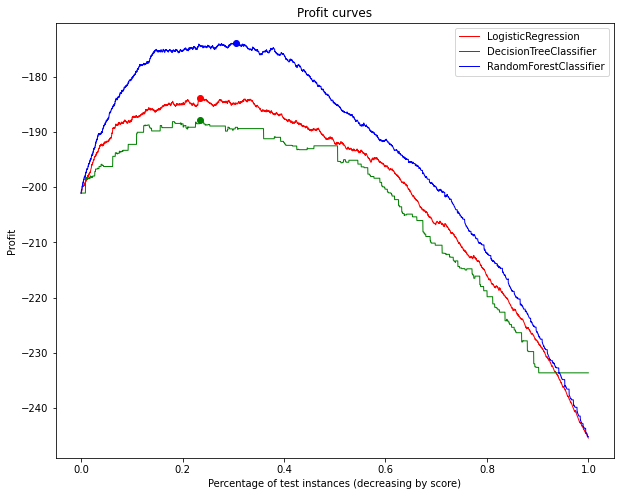

In [388]:
models = [best_LogisticRegression,
          best_decision_tree,
          best_random_forest]
fig = plt.figure(figsize=(10,8))

colors = ['r', 'g', 'b']

for i, model in enumerate(models):
    plot_profit_curve(model, model.__class__.__name__, cb_matrix,
                      X_train, X_test, y_train, y_test, colors[i])
    
plt.title("Profit curves")
plt.xlabel("Percentage of test instances (decreasing by score)")
plt.ylabel("Profit")
plt.legend(loc='upper right')
plt.savefig('Profit_curve.png', facecolor=fig.get_facecolor())
plt.show()

# 7. Other Data Explorations

In [ ]:
sns.relplot(x="NUMBER_OF_SEATS",y="PLANE_AGE",col="DEP_BLOCK",hue='DEP_DEL15',row=None,kind='scatter',data=df)

In [ ]:
sns.relplot(x="NUMBER_OF_SEATS",y="PLANE_AGE",col=None,hue='DEP_DEL15',row=None,kind='scatter',data=df)